In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset = pd.read_csv('/content/Tweets.csv')

In [ ]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

In [ ]:
print(X)

[[570306133677760513 'neutral' 1.0 ... nan '2015-02-24 11:35:52 -0800'
  nan]
 [570301130888122368 'positive' 0.3486 ... nan
  '2015-02-24 11:15:59 -0800' nan]
 [570301083672813571 'neutral' 0.6837 ... nan '2015-02-24 11:15:48 -0800'
  'Lets Play']
 ...
 [570208349339262976 'negative' 0.7125 ... nan
  '2015-02-24 05:07:19 -0800' 'Minneapolis, MN']
 [570207643874123777 'negative' 1.0 ... nan '2015-02-24 05:04:30 -0800'
  'Dallas, TX']
 [570206560439308289 'neutral' 1.0 ... nan nan nan]]


In [ ]:
print(y)

['Eastern Time (US & Canada)' 'Pacific Time (US & Canada)'
 'Central Time (US & Canada)' ... 'Central Time (US & Canada)'
 'Mountain Time (US & Canada)' nan]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(dataset.shape)

(4493, 15)


In [ ]:
dataset.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
dataset = dataset[dataset['airline_sentiment'] != 'neutral']
print(dataset.shape)
dataset.head(10)

(3579, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
11,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,2015-02-24 10:30:40 -0800,NYC,America/New_York
12,570289584061480960,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica This is such a great deal! Alre...,NaN,2015-02-24 10:30:06 -0800,NYC,America/New_York
13,570287408438120448,positive,0.6451,NaN,NaN,Virgin America,NaN,mollanderson,NaN,0,@VirginAmerica @virginmedia I'm flying your #f...,NaN,2015-02-24 10:21:28 -0800,NaN,Eastern Time (US & Canada)


In [ ]:
dataset["airline_sentiment"].value_counts()

negative    2906
positive     673
Name: airline_sentiment, dtype: int64

In [ ]:
sentiment_label = dataset.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
tweet = dataset.text.values

In [ ]:
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           215520    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 232,171
Trainable params: 232,171
Non-trainable params: 0
__________________________________________________

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  positive
Predicted label:  negative


In [18]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
90/90 [==============================] - 26s 253ms/step - loss: 0.5159 - accuracy: 0.8051 - val_loss: 0.4547 - val_accuracy: 0.8156
Epoch 2/5
90/90 [==============================] - 22s 240ms/step - loss: 0.3779 - accuracy: 0.8397 - val_loss: 0.3723 - val_accuracy: 0.8506
Epoch 3/5
90/90 [==============================] - 22s 239ms/step - loss: 0.2538 - accuracy: 0.9025 - val_loss: 0.3612 - val_accuracy: 0.8631
Epoch 4/5
90/90 [==============================] - 22s 243ms/step - loss: 0.1824 - accuracy: 0.9329 - val_loss: 0.3492 - val_accuracy: 0.8743
Epoch 5/5
90/90 [==============================] - 22s 245ms/step - loss: 0.1480 - accuracy: 0.9542 - val_loss: 0.3441 - val_accuracy: 0.8701


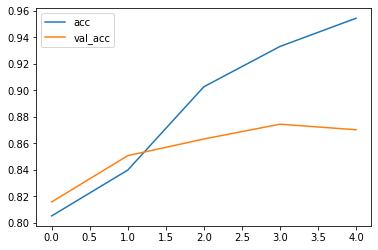

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

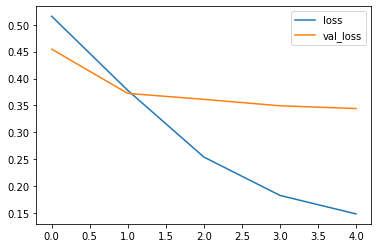

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")